#Sebelum Optimasi

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
wine = pd.read_csv("wine.csv")

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
feature = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [ ]:
x = wine.drop(columns='quality')
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 0.5958333333333333
Accuracy: 1.0


In [ ]:
fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(clf, 
                   feature_names=feature,  
                   class_names=["3", "4", "5", "6", "7", "8"],
                   filled=True)

Output hidden; open in https://colab.research.google.com to view.

#Optimasi

##Fitur Sexy

###Korelasi

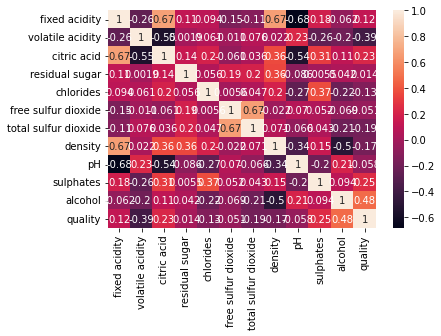

In [ ]:
corrMatrix = wine.corr()
sns.heatmap(corrMatrix, annot=True)

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
wine.corr() < (-0.5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,False,False,False,False,False,False,False,False,True,False,False,False
volatile acidity,False,False,True,False,False,False,False,False,False,False,False,False
citric acid,False,True,False,False,False,False,False,False,True,False,False,False
residual sugar,False,False,False,False,False,False,False,False,False,False,False,False
chlorides,False,False,False,False,False,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,False,False,False,False,False,False,False
total sulfur dioxide,False,False,False,False,False,False,False,False,False,False,False,False
density,False,False,False,False,False,False,False,False,False,False,False,False
pH,True,False,True,False,False,False,False,False,False,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
feature_corr = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 
                'free sulfur dioxide', 'pH', 'sulphates', 'alcohol']

x = wine[feature_corr]
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6166666666666667


###SelectKbest

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = wine[feature]
y = wine['quality']

for i in range(1, 12):
  # define feature selection
  fs = SelectKBest(score_func=f_classif, k=i)

  # apply feature selection
  X_selected = fs.fit_transform(X, y)
  print(fs.get_support(indices=True))

  X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=1)

  clf = DecisionTreeClassifier(criterion="gini")
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[10]
Accuracy: 0.56875
[ 1 10]
Accuracy: 0.5416666666666666
[ 1  6 10]
Accuracy: 0.5854166666666667
[ 1  6  9 10]
Accuracy: 0.5979166666666667
[ 1  2  6  9 10]
Accuracy: 0.5958333333333333
[ 1  2  6  7  9 10]
Accuracy: 0.6083333333333333
[ 0  1  2  6  7  9 10]
Accuracy: 0.5895833333333333
[ 0  1  2  4  6  7  9 10]
Accuracy: 0.5979166666666667
[ 0  1  2  4  5  6  7  9 10]
Accuracy: 0.5854166666666667
[ 0  1  2  4  5  6  7  8  9 10]
Accuracy: 0.6125
[ 0  1  2  3  4  5  6  7  8  9 10]
Accuracy: 0.5958333333333333


In [ ]:
X.shape

(1599, 11)

##Hyperparameter tuning using GridSearchCV

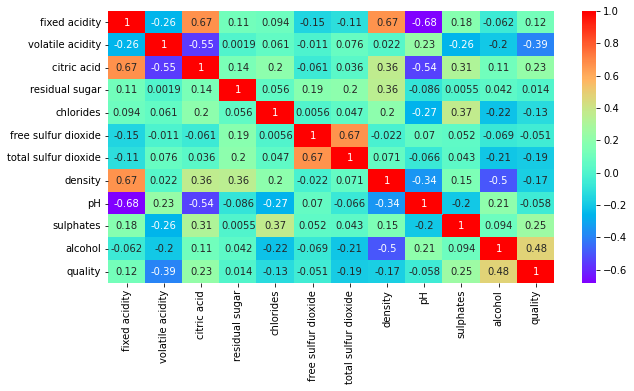

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(wine.corr(), annot = True, cmap="rainbow")
plt.show()

In [ ]:
feature_corr = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 
                'free sulfur dioxide', 'pH', 'sulphates', 'alcohol']

x = wine[feature_corr]
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=1)

clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Test Accuracy :",metrics.accuracy_score(y_test, y_pred))
print("Train Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Test Accuracy : 0.60625
Train Accuracy: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

x = wine[feature_corr]
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=1)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'splitter' : ['best', 'random'],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=10,
                       max_features='auto', random_state=1)

In [ ]:
x = wine[feature_corr]
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=1)

clf = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=10,
                       max_features='auto', random_state=1)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Train Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Test Accuracy: 0.5583333333333333
Train Accuracy: 0.6076854334226989


[3, 4, 5, 6, 7, 8]

In [ ]:
pd.DataFrame({"Feature": feature_corr, "Importance": clf.feature_importances_}).sort_values(by="Importance")

,Feature,Importance
0,fixed acidity,0.000000
5,pH,0.034874
3,chlorides,0.035477
2,residual sugar,0.045391
4,free sulfur dioxide,0.080776
1,volatile acidity,0.098723
6,sulphates,0.227051
7,alcohol,0.477709


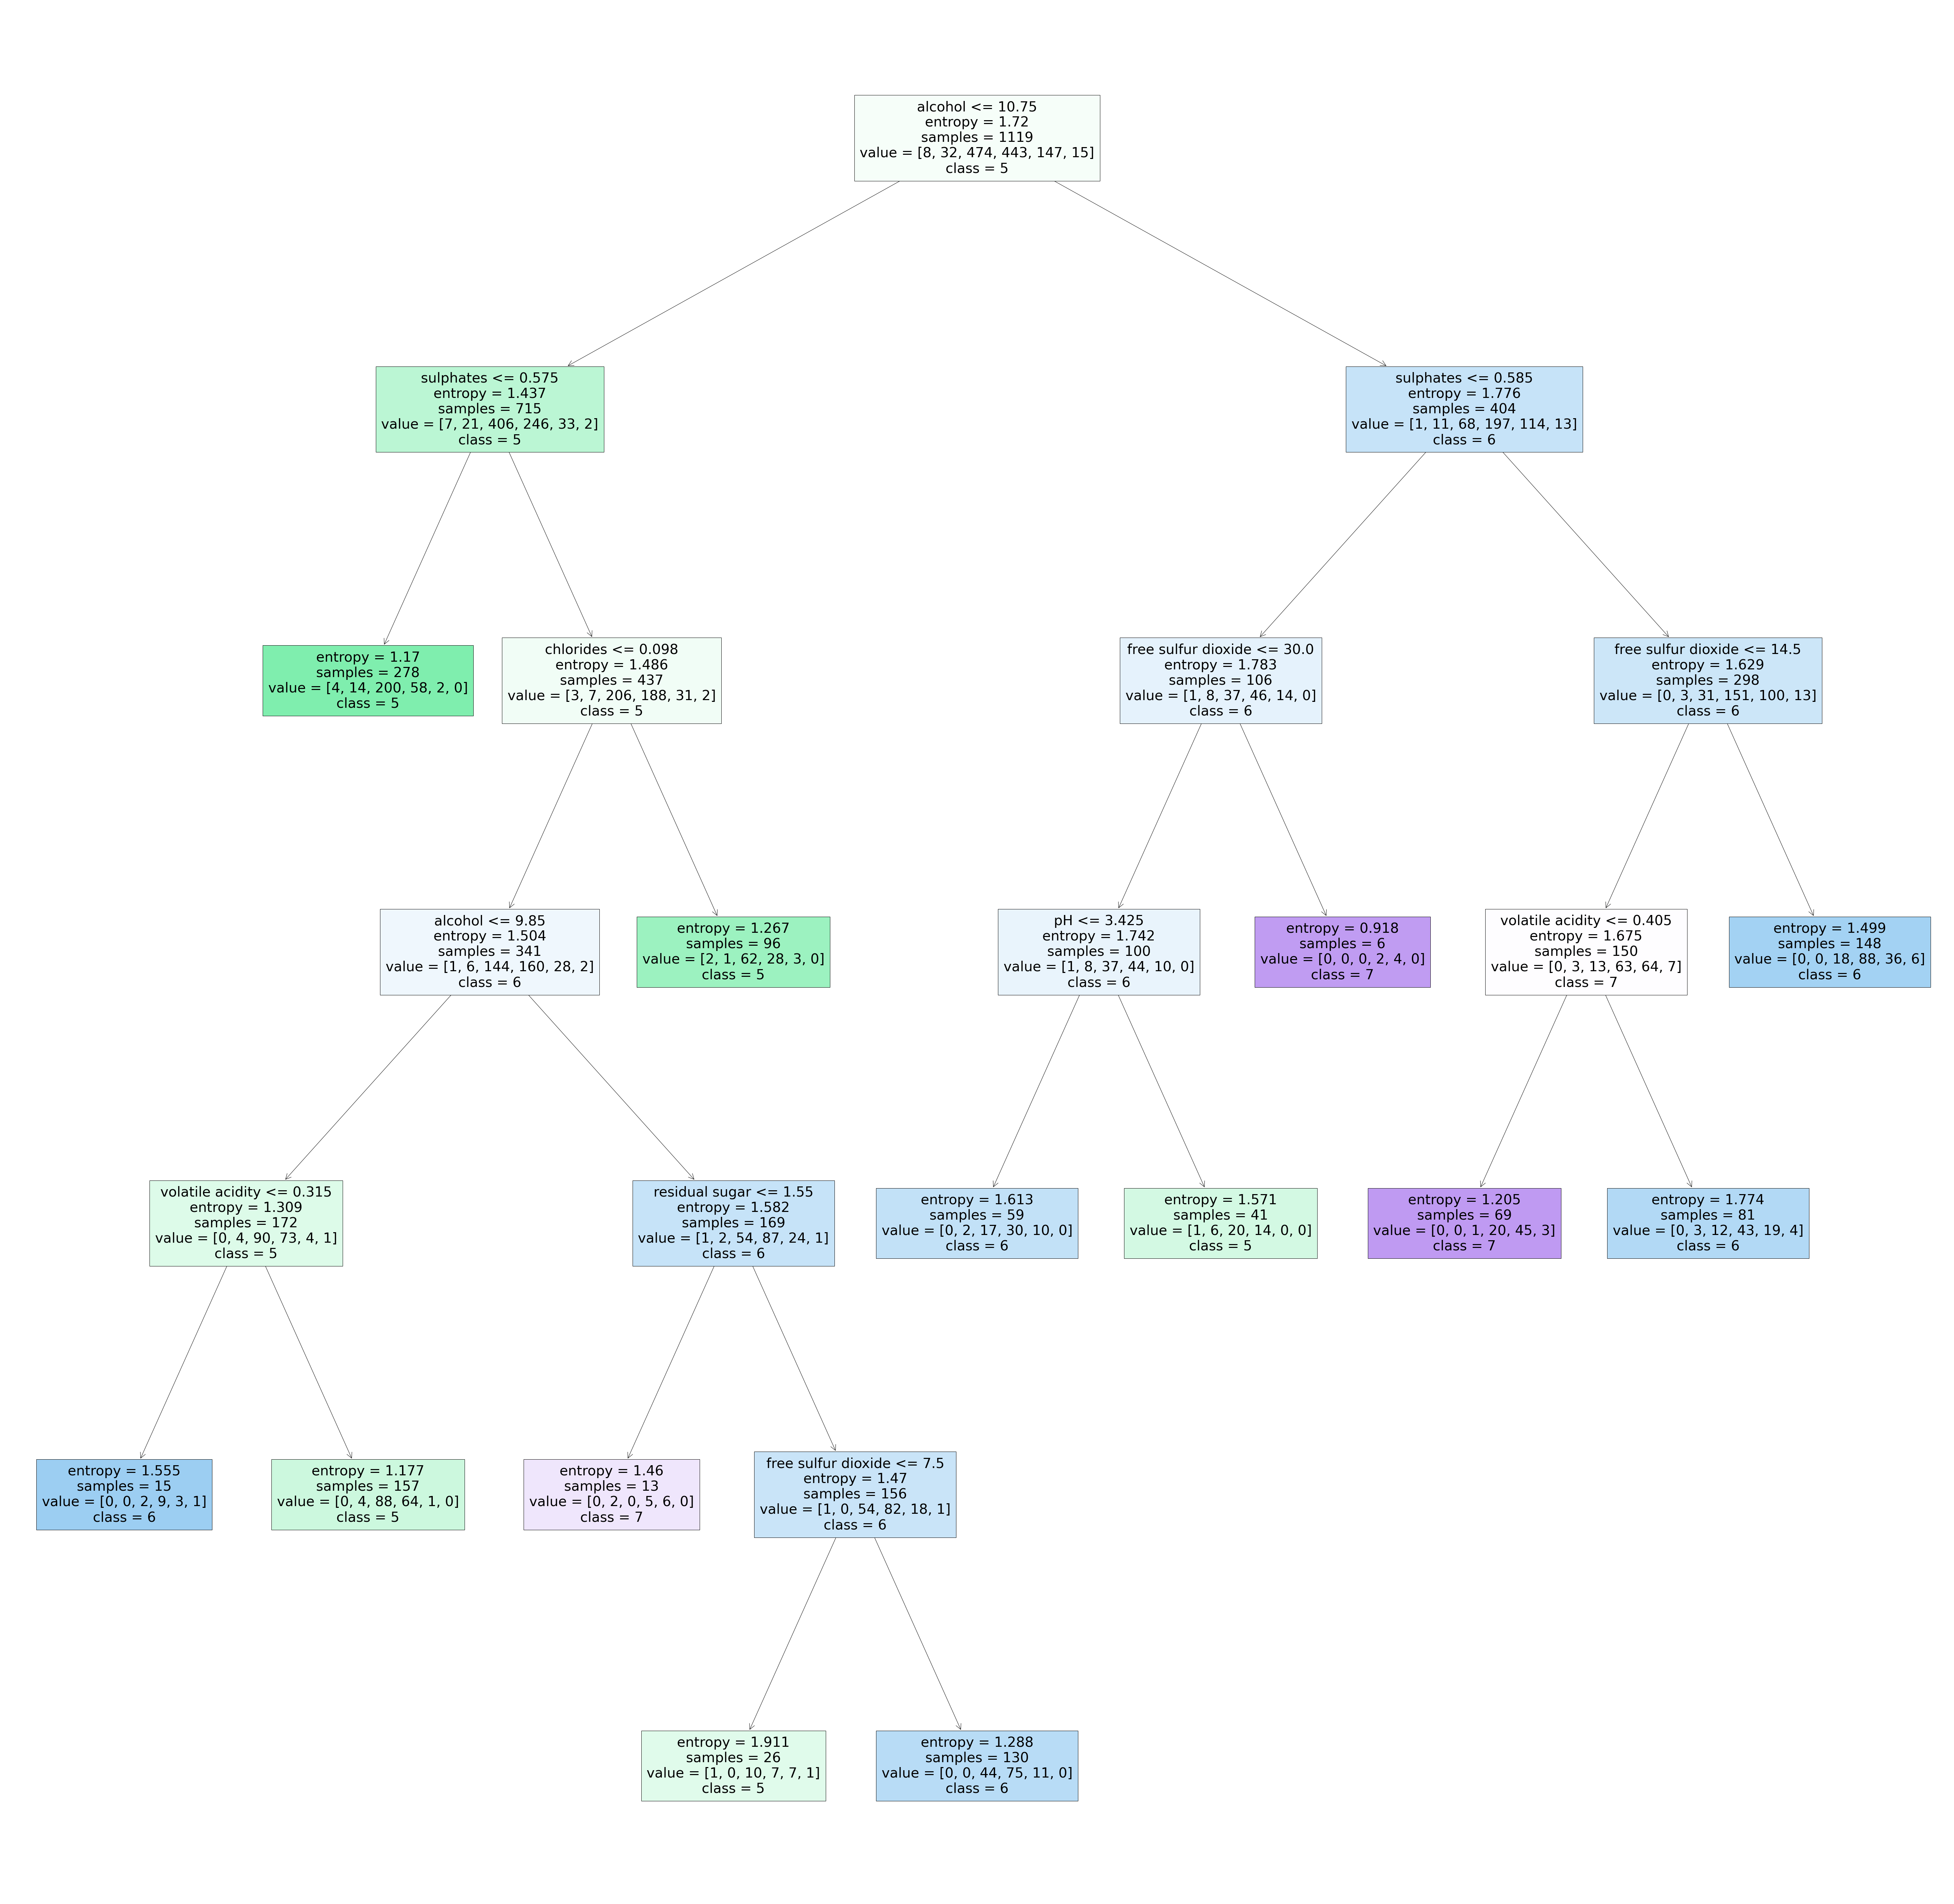

In [ ]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf, 
                   feature_names=feature_corr,  
                   class_names=["3", "4", "5", "6", "7", "8"],
                   filled=True)

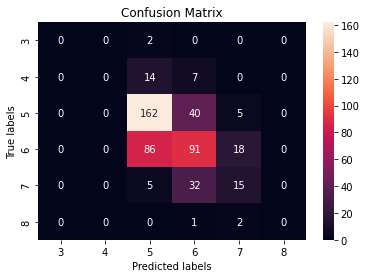

In [ ]:
cm = confusion_matrix(y_test, y_pred)

classes = [3,4,5,6,7,8]

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, yticklabels=classes, xticklabels=classes);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##Change to 3 class

In [ ]:
y.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

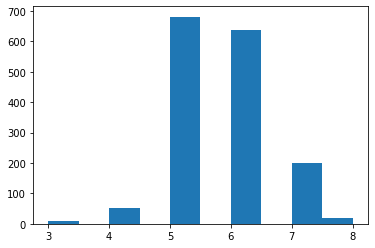

In [ ]:
plt.hist(y)

In [ ]:
quality_target = np.unique(wine.quality)
quality_change = np.array([0, 0, 1, 1, 2, 2])

y = wine['quality'].replace(dict(zip(quality_target, quality_change)))
x = wine[feature_corr]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

clf = DecisionTreeClassifier(criterion='gini',)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 0.8020833333333334
Accuracy: 1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=1)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9, 10],
              'splitter' : ['best', 'random'],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='log2',
                       random_state=1)

In [ ]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='log2',
                       random_state=1)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Test Accuracy :",metrics.accuracy_score(y_test, y_pred))
print("Train Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Test Accuracy : 0.8333333333333334
Train Accuracy: 0.9329758713136729


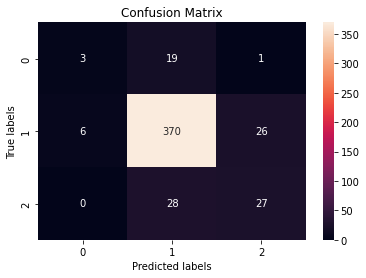

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

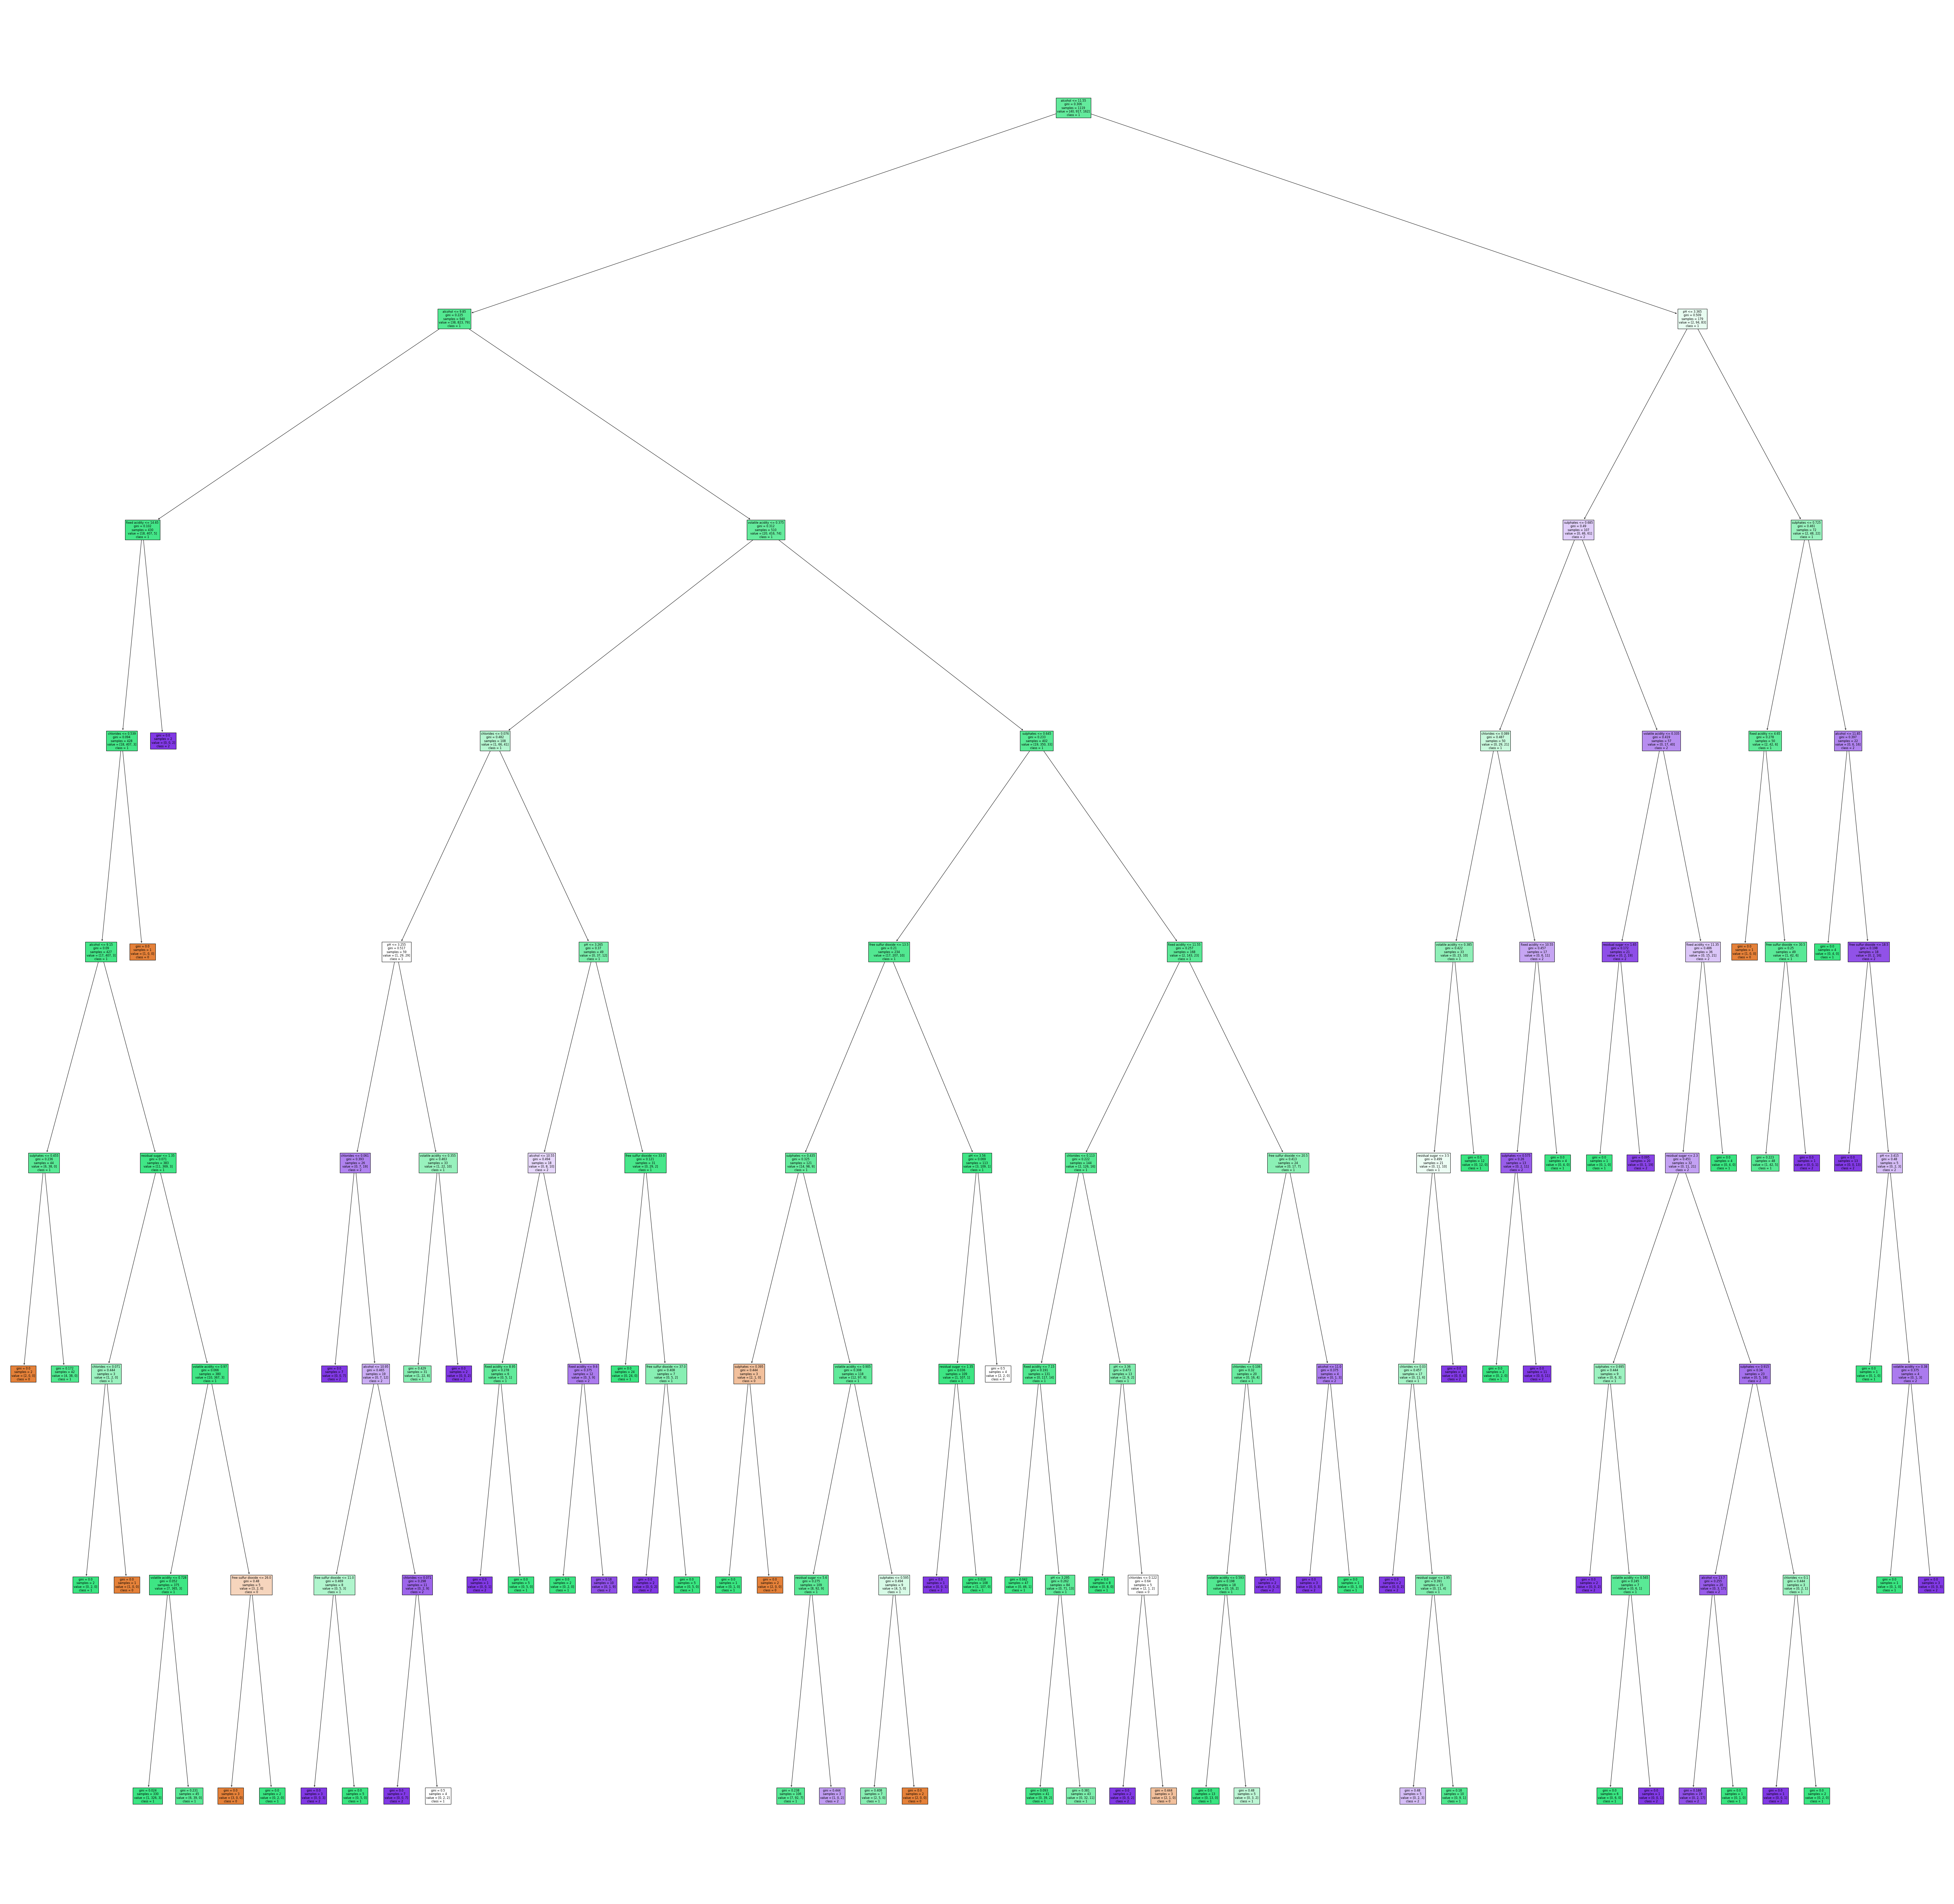

In [ ]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf, 
                   feature_names=feature_corr,  
                   class_names=["0", "1", "2"],
                   filled=True)

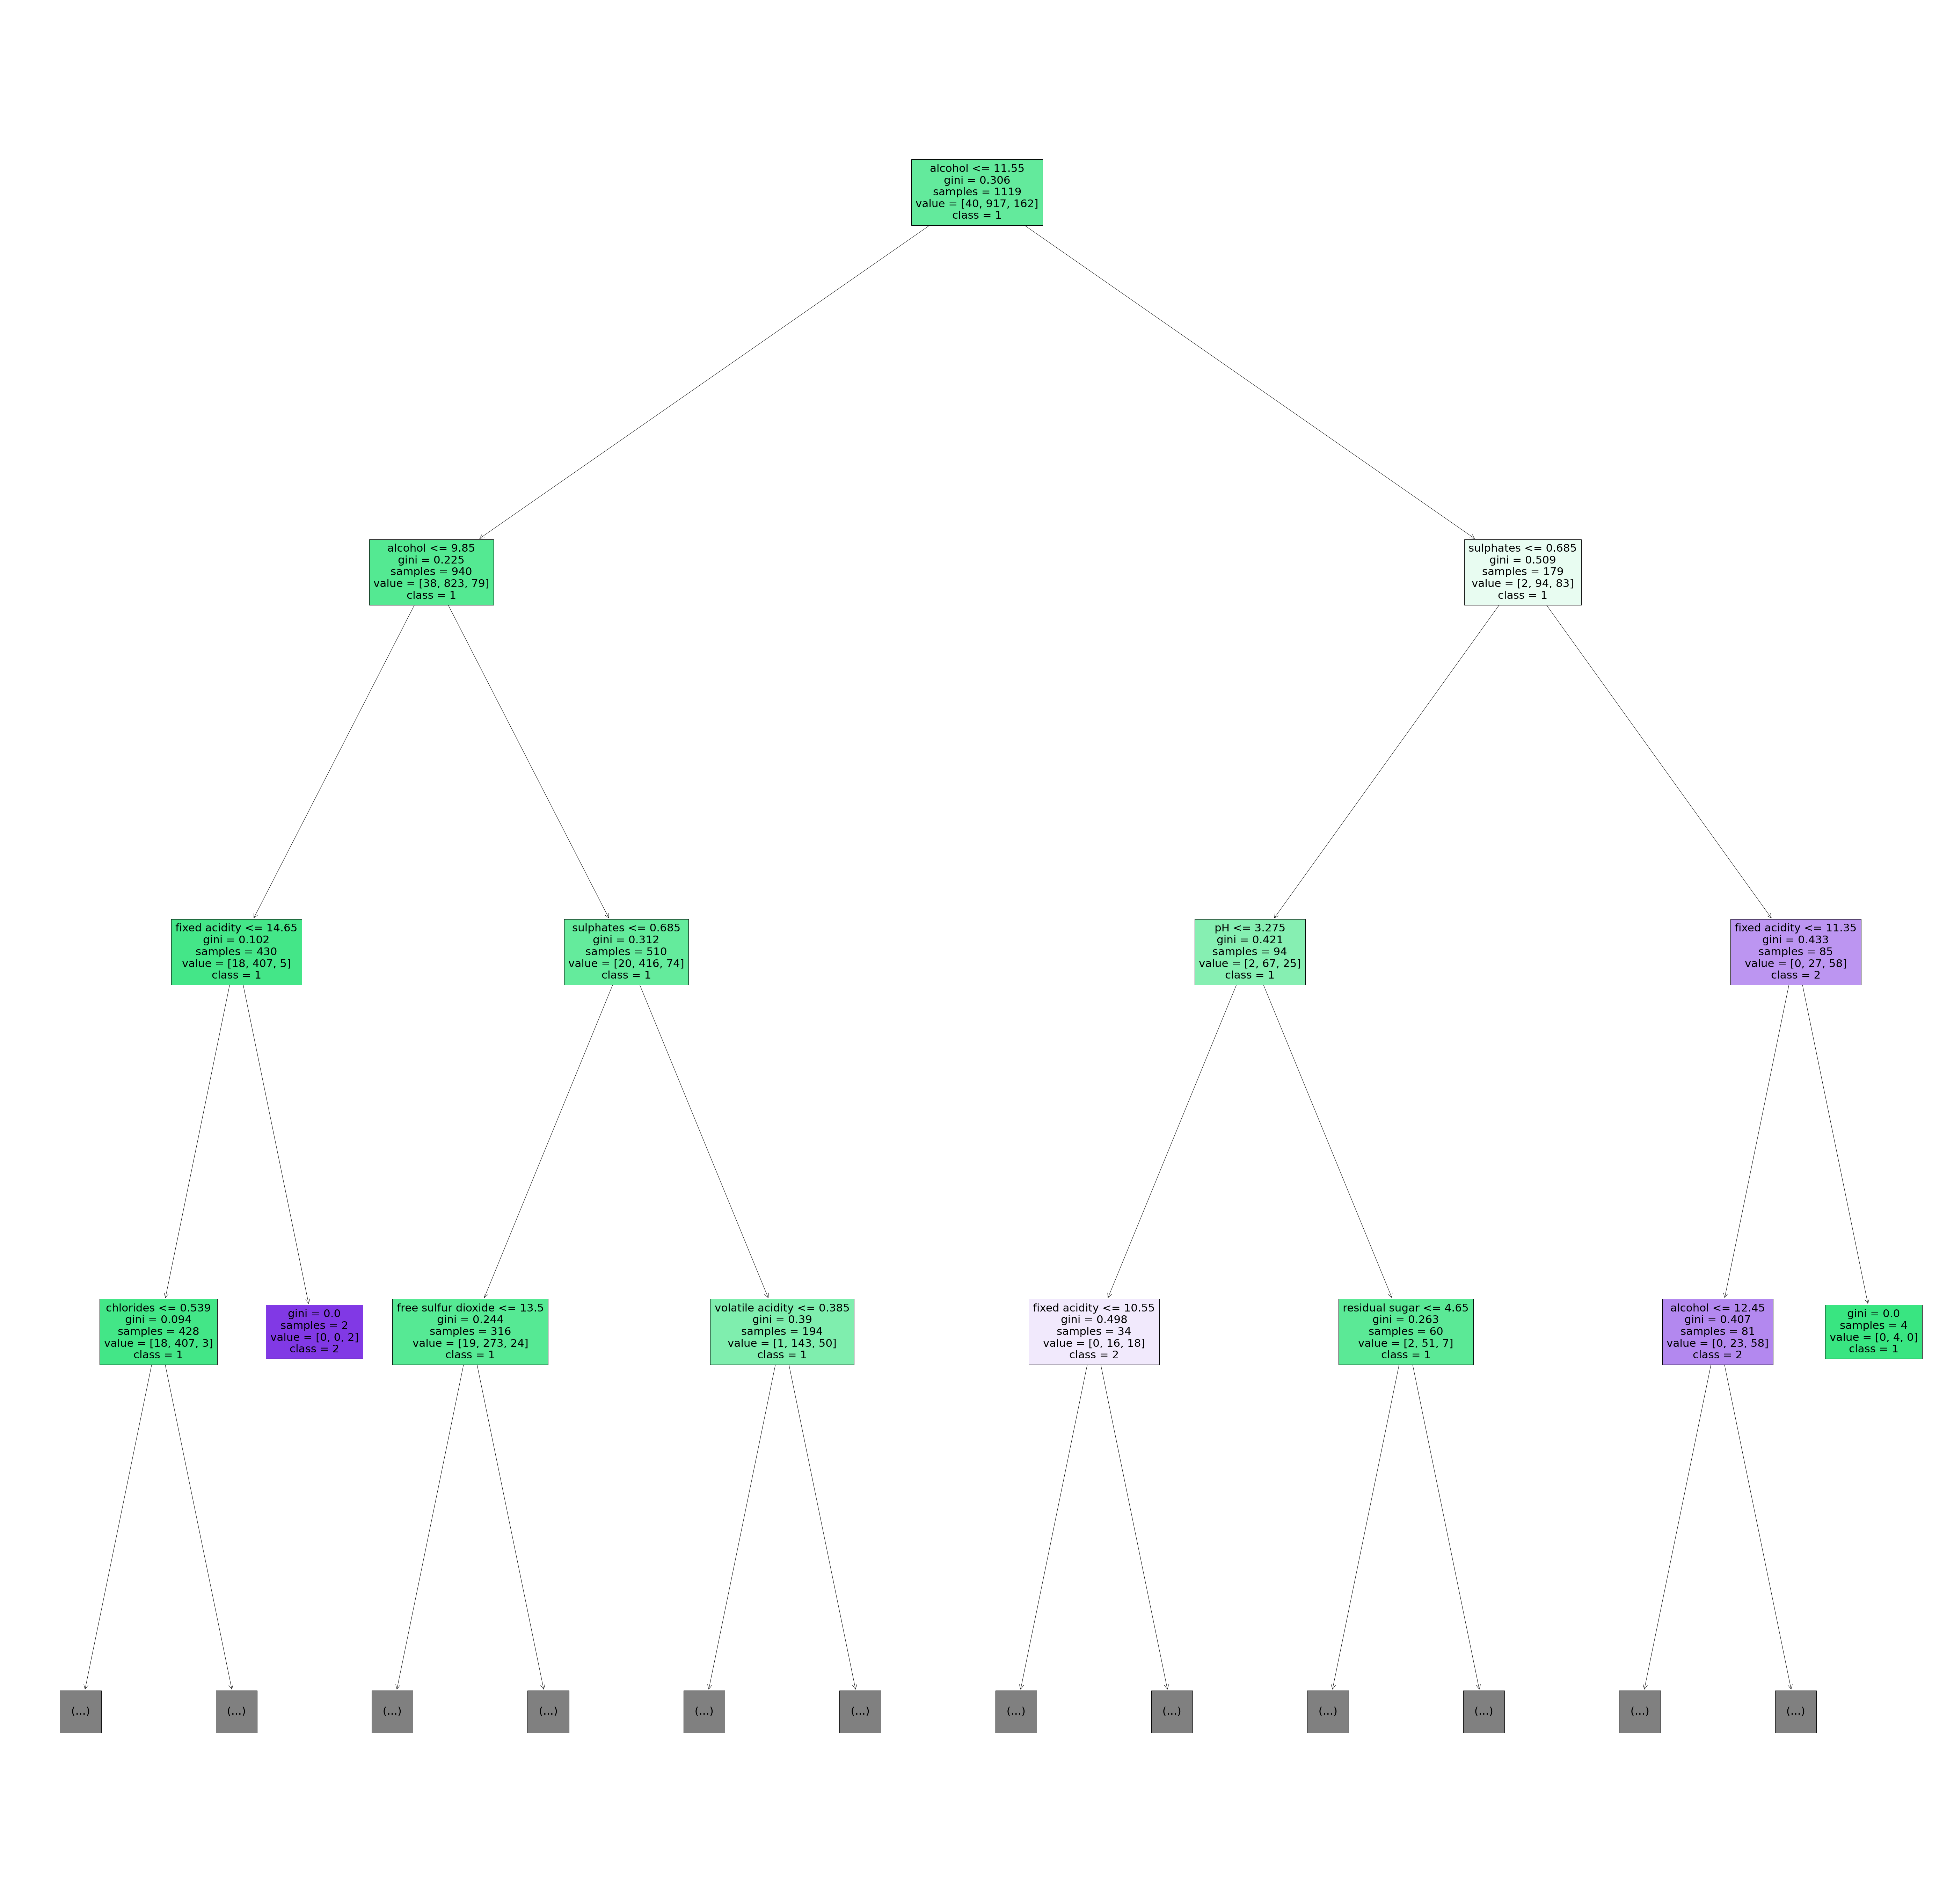

In [ ]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, max_features='log2',
                       random_state=1)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf, 
                   feature_names=feature_corr,  
                   class_names=["0", "1", "2"],
                   max_depth = 3,
                   filled=True)